In [1]:
import pandas as pd
import numpy as np
import datetime 
import math
from matplotlib import pyplot as plt

In [2]:
%cd ..

c:\Users\Frank\OneDrive\Documents\git\delta_test_bnc


In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from bnc_tms import tms

In [5]:
#Dummy dates
ndays = int(60 * 7/5)
base = datetime.date.today()
dates = [base - datetime.timedelta(days = n) for n in range(ndays)]
dates = np.array([x for x in dates if x.weekday() not in [5,6]])

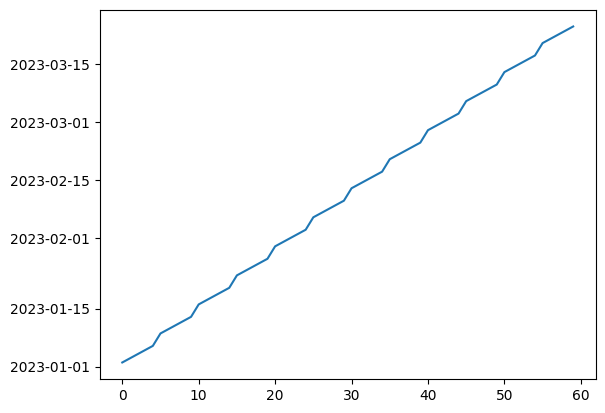

In [6]:
plt.plot(np.flip(dates))

In [7]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/50)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

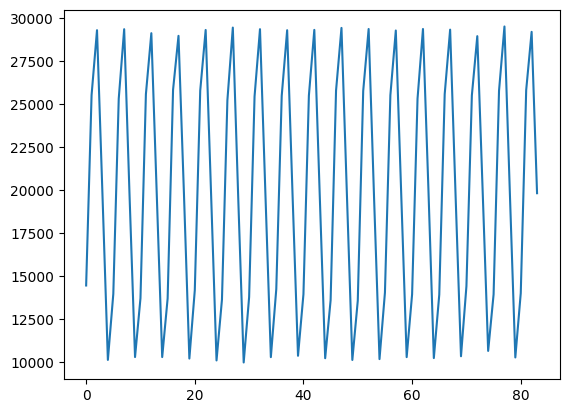

In [8]:
plt.plot(np.flip(nrows))

In [9]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [10]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 1.0
***
Daily trend: -1.2171
Sinusoidal term: 7.8298
Lag term: 0.9983
Lag (days): 7.0
***
Test alpha: 0.05
Observed volume: 19839.0
Expected volume: 19777.4681
0.95 CI: (19402.0122, 20152.924)
p-value: 0.7481
Result: PASS
------------------------------------------


In [11]:
#Dummy volume
vol = 10000
nrows = np.array([int(vol * (2 + math.sin(i * 2*math.pi/5))) for i in range(ndays)])

sdev = int(vol/5)
nrows = nrows + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = vol + nrows - min(nrows)

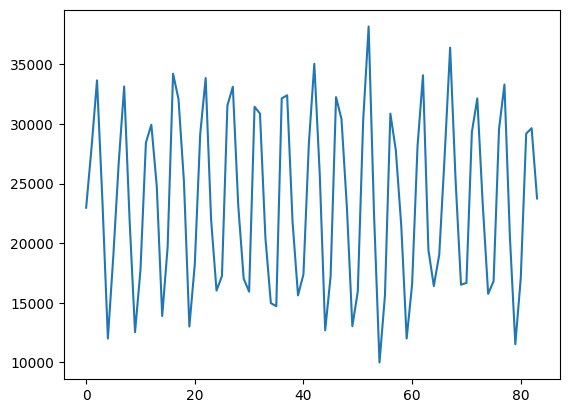

In [12]:
plt.plot(np.flip(nrows))

In [13]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [14]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.86
***
Daily trend: -3.6953
Sinusoidal term: 474.1154
Lag term: 0.9107
Lag (days): 7.0
***
Test alpha: 0.05
Observed volume: 23757.0
Expected volume: 20057.5614
0.95 CI: (15293.4948, 24821.628)
p-value: 0.128
Result: PASS
------------------------------------------


In [15]:
#Dummy volume
vol = 10000
sdev = int(vol/300)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])

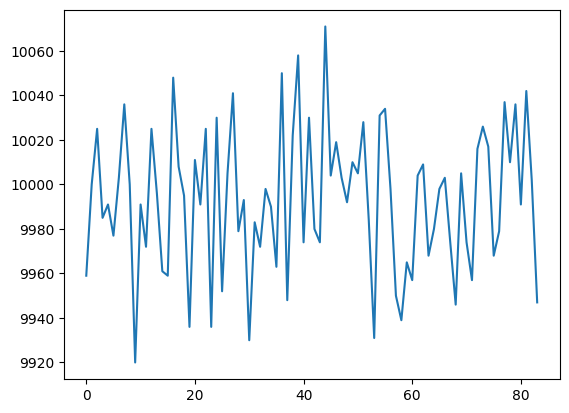

In [16]:
plt.plot(np.flip(nrows))

In [17]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [18]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.0
***
Daily trend: 0.0409
Sinusoidal term: NULL
Lag term: NULL
Lag (days): NULL
***
Test alpha: 0.05
Observed volume: 9947.0
Expected volume: 9997.5516
0.95 CI: (9942.4747, 10052.6286)
p-value: 0.072
Result: PASS
------------------------------------------


In [19]:
#Dummy volume
vol = 10000
sdev = int(vol/20)
nrows = vol + np.array([int(np.random.normal(0, sdev)) for n in range(ndays)])
nrows = nrows - 100 * np.array([i for i in range(len(nrows))])

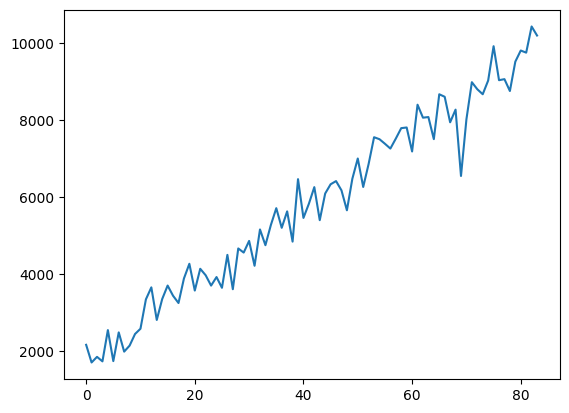

In [20]:
plt.plot(np.flip(nrows))

In [21]:
#Frame
rows = [[dt, v] for dt,v in zip(dates, nrows)]
df = pd.DataFrame(rows, columns = ["Date", "Rows"])

In [22]:
tms_model = tms.timeseries_model(df, 0.05)

------ DELTA TIMESERIES TEST RESULT ------
Model r-squared: 0.93
***
Daily trend: 68.7952
Sinusoidal term: NULL
Lag term: NULL
Lag (days): NULL
***
Test alpha: 0.05
Observed volume: 10195.0
Expected volume: 9733.2249
0.95 CI: (8905.2066, 10561.2433)
p-value: 0.2744
Result: PASS
------------------------------------------
